<a href="https://colab.research.google.com/github/sidharkal/The-Spark-Foundtion/blob/master/Task_2_The_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().values.any()

False

In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Scores')

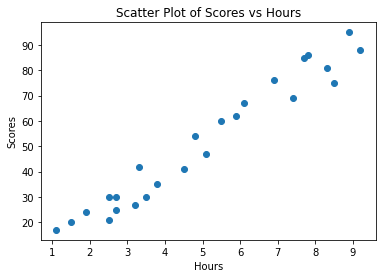

In [6]:
plt.scatter(data.Hours,data.Scores)
plt.title('Scatter Plot of Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0, 0.5, 'count')

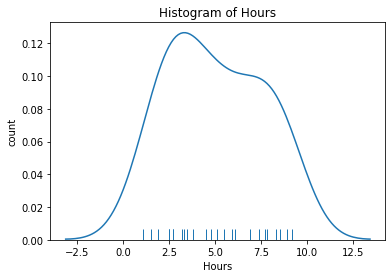

In [7]:
sns.distplot(data.Hours, hist=False, rug=True);
plt.title('Histogram of Hours')
plt.xlabel('Hours')
plt.ylabel('count')

Text(0, 0.5, 'count')

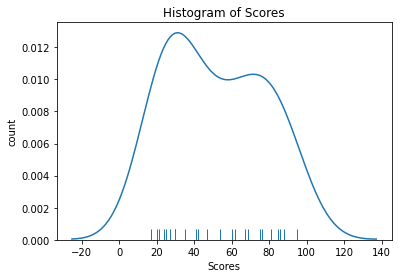

In [8]:
sns.distplot(data.Scores, hist=False, rug=True);
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('count')

In [9]:
X = pd.DataFrame(data['Hours'])
y = pd.DataFrame(data['Scores'])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
%time lr.fit(x_train,y_train)

CPU times: user 4.81 ms, sys: 370 µs, total: 5.18 ms
Wall time: 32.5 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = lr.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print( np.sqrt( mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4.9383823606376005
4.877039354964476
0.9735538080811826


In [14]:
lr.coef_

array([[9.94061514]])

In [15]:
lr.intercept_

array([1.50791048])

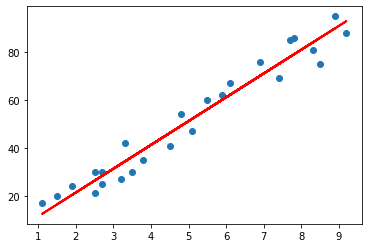

In [16]:
linear_line=lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X,linear_line,color='red', linewidth=2)
plt.show()

## XGBRegressor

In [17]:
from xgboost import XGBRegressor
clf = XGBRegressor()
%time clf.fit(x_train,y_train)

[11:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 14.7 ms, sys: 8.14 ms, total: 22.8 ms
Wall time: 122 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
y_pred = clf.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print( np.sqrt( mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

5.954751082368306
5.663576126098633
0.9615478220124853


### PREDICTED SCORE IF A STUDENT STUDY FOR 9.25 HRS IN A DAY

In [20]:
hours = [[9.25]]
score_pred = lr.predict(hours)

In [21]:
print("Study Hours = ",hours[0][0])
print("Predicted Score = ",score_pred[0])

Study Hours =  9.25
Predicted Score =  [93.45860056]
